### Importing Required Libraries

This study is an example of end-to-end Multi-class classification by Python. Codes used in this study are gathered from different internet sources and modified for our study.

In [1]:
# Exploratory Data Analysis and Plotting
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from itertools import cycle

%matplotlib inline 

## Modelling
from sklearn.preprocessing import label_binarize
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

## Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, roc_curve, auc
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical

### Data

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Attribute Information:

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.) Perimeter (P): Bean circumference is defined as the length of its border.
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.) Aspect ratio (K): Defines the relationship between L and l.
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.)Compactness (CO): Measures the roundness of an object: Ed/L
13.)ShapeFactor1 (SF1)
14.)ShapeFactor2 (SF2)
15.)ShapeFactor3 (SF3)
16.)ShapeFactor4 (SF4)
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

Relevant Papers:

KOKLU, M. and OZKAN, I.A., (2020), Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.â€ Computers and Electronics in Agriculture, 174, 105507.


In [2]:
df = pd.read_excel('D:/PGR210_Project/Dry_Bean_Dataseto.xlsx') # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)

(13611, 17)

### Exploratory data analysis (EDA)

In [3]:
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [141]:
df.tail(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13601,42042,771.515,288.082674,186.347090,1.545947,0.762615,42476,231.364511,0.816254,0.989782,0.887574,0.803118,0.006852,0.001758,0.644999,0.997134,4
13602,42047,768.936,292.975007,183.139141,1.599740,0.780543,42446,231.378269,0.773890,0.990600,0.893644,0.789754,0.006968,0.001672,0.623712,0.997777,4
13603,42049,770.185,290.163403,185.051685,1.568013,0.770243,42503,231.383771,0.756005,0.989318,0.890790,0.797426,0.006901,0.001721,0.635888,0.997080,4
13604,42070,763.489,289.022373,186.123434,1.552853,0.765046,42556,231.441543,0.768823,0.988580,0.906936,0.800774,0.006870,0.001743,0.641239,0.995750,4
13605,42070,760.701,276.691651,193.945366,1.426647,0.713216,42458,231.441543,0.730813,0.990862,0.913596,0.836460,0.006577,0.001986,0.699666,0.998176,4
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,4
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,4
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,4
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,4
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,4


value_counts() allows you to show how many times each of the values of a categorical column appear.


In [5]:
# Let's see how many different bean type samples we have in our dataframe
df.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

If you'd prefer these values in percentages, value_counts() takes a parameter, normalize which can be set to true.

In [6]:
# Normalized value counts
df.Class.value_counts(normalize=True)

DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: Class, dtype: float64

We can plot the target column value counts by calling the plot() function and telling it what kind of plot we'd like, in this case, bar is good.

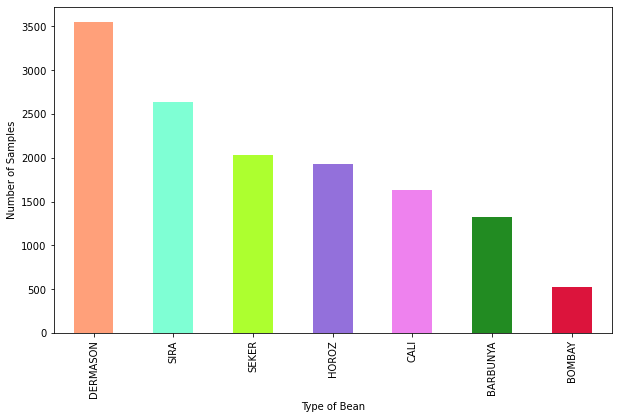

In [7]:
# Plot the value counts with a bar graph
df.Class.value_counts().plot(kind="bar", 
                             color=["lightsalmon", "aquamarine", "greenyellow", "mediumpurple", "violet", "forestgreen", "crimson"],
                             figsize= (10,6), 
                             xlabel='Type of Bean', 
                             ylabel='Number of Samples');

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Another way to get some quick insights on your dataframe is to use df.describe(). describe() shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [9]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


### Correlation between independent variables

This may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using df.corr() which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.

In [142]:
# Findin correlation between independent variables
corr_matrix = df.corr()
corr_matrix

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721,-0.475252
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310,-0.507638
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527,-0.455175
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749,-0.458492
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264,-0.116332
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354,-0.200356
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049,-0.477459
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512,-0.481099
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502,-0.031184
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163,0.321283


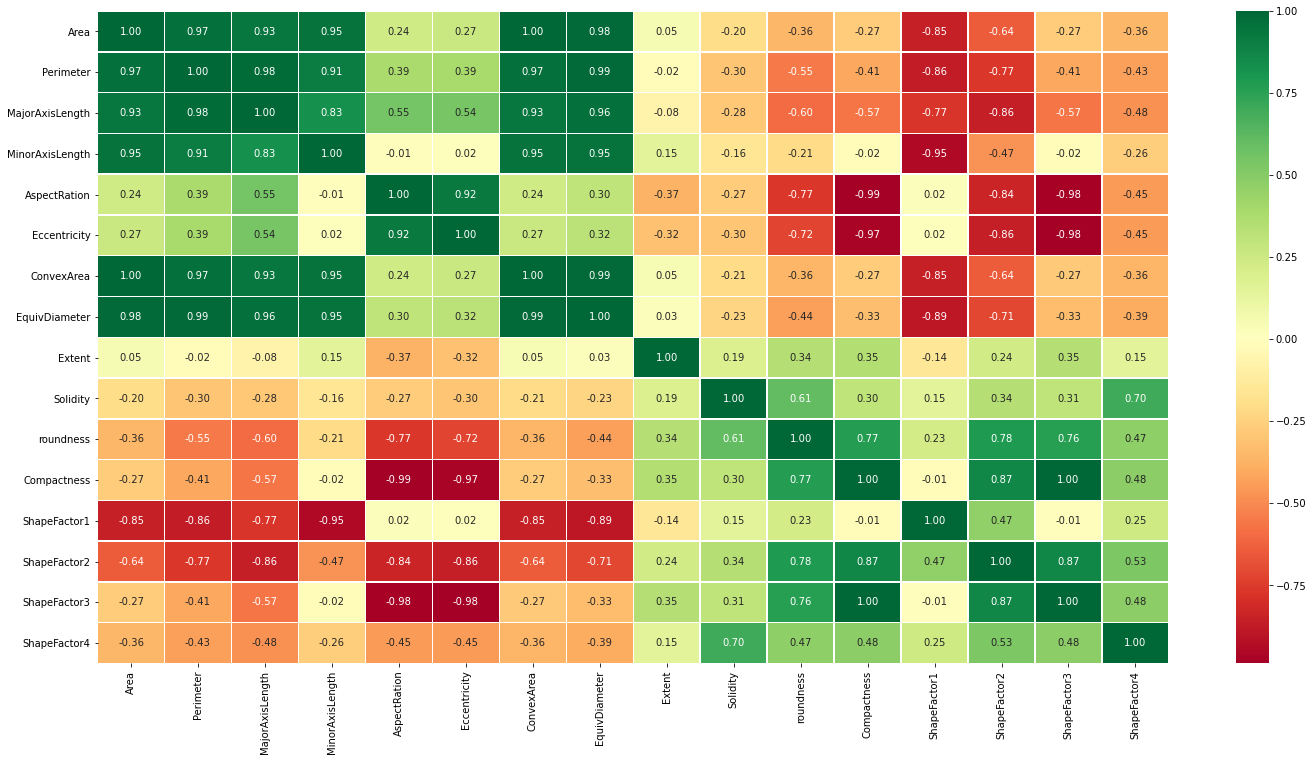

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(24,12))
sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt= ".2f",cmap="RdYlGn");

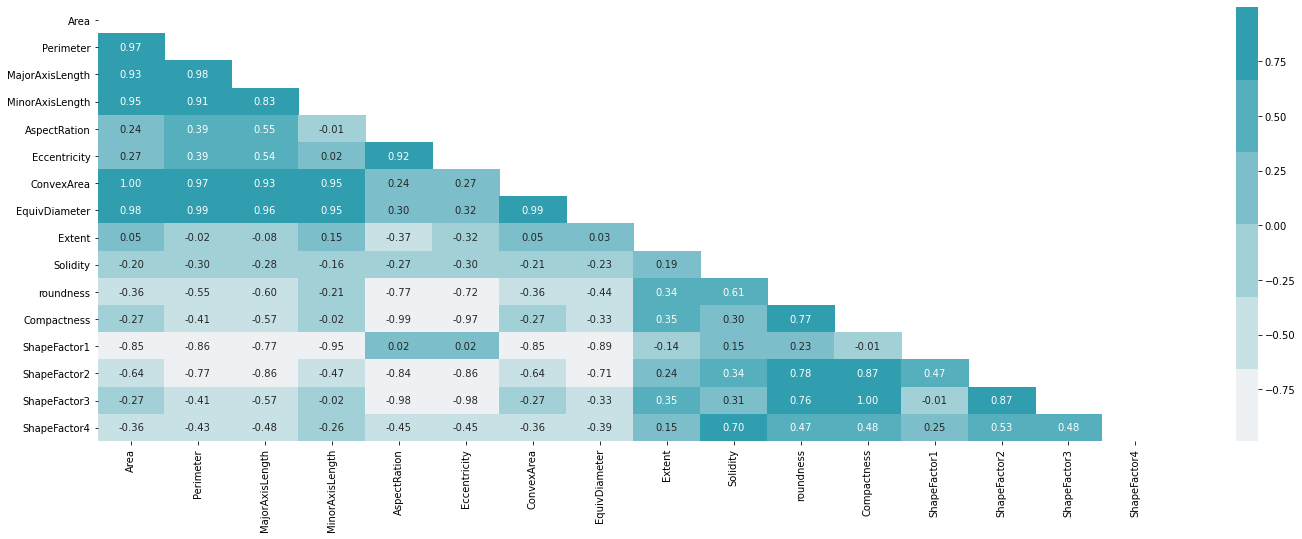

In [12]:
# Heatmap with mask
plt.figure(figsize=(24,8))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
sns.heatmap(df.corr(), mask=mask, cmap=cmap, annot=True, fmt=".2f");

### Modeling

In [13]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest.

In [14]:
# Everything except target variable
X = df.drop("Class", axis=1)
Y = df['Class']

# Target variable
y = df.Class.values

In [15]:
# Independent variables (no target column)
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [16]:
# Targets
y

array(['SEKER', 'SEKER', 'SEKER', ..., 'DERMASON', 'DERMASON', 'DERMASON'],
      dtype=object)

### Train and Test Split

In [18]:
# Random seed for reproducibility
np.random.seed(25)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.3) # percentage of data to use for test set

In [20]:
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
12445,34399,685.187,254.244712,172.495613,1.473920,0.734635,34762,209.280116,0.753010,0.989558,0.920741,0.823144,0.007391,0.002093,0.677567,0.998679
8539,43634,778.307,293.979121,189.264274,1.553273,0.765192,43994,235.704337,0.767664,0.991817,0.905176,0.801772,0.006737,0.001717,0.642839,0.998504
9834,51042,847.843,322.411996,202.365656,1.593215,0.778486,51578,254.928800,0.775655,0.989608,0.892291,0.790693,0.006317,0.001523,0.625195,0.996070
4383,70724,1029.749,394.001824,229.948757,1.713433,0.812024,71394,300.080978,0.738879,0.990615,0.838135,0.761623,0.005571,0.001156,0.580070,0.993911
2116,54614,925.529,339.952293,205.370604,1.655311,0.796896,55585,263.698131,0.769753,0.982531,0.801187,0.775692,0.006225,0.001390,0.601697,0.995997


In [21]:
y_train, len(y_train)

(array(['DERMASON', 'SIRA', 'SIRA', ..., 'HOROZ', 'SIRA', 'DERMASON'],
       dtype=object),
 9527)

Beautiful, we can see we're using 9527 samples to train on. Let's look at our test data.

In [22]:
X_test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
9565,48836,832.466,311.847709,200.316108,1.556778,0.766409,49425,249.359031,0.801984,0.988083,0.885558,0.799618,0.006386,0.001610,0.639389,0.995387
10740,27638,614.973,224.227248,157.568304,1.423048,0.711469,27951,187.589431,0.712613,0.988802,0.918342,0.836604,0.008113,0.002452,0.699906,0.996000
3986,62741,957.314,365.757281,221.407745,1.651962,0.795967,63687,282.638147,0.756846,0.985146,0.860305,0.772748,0.005830,0.001282,0.597139,0.986452
438,35978,687.586,243.530245,188.414958,1.292521,0.633574,36297,214.029466,0.746927,0.991211,0.956297,0.878862,0.006769,0.002491,0.772398,0.998341
2803,71601,1107.086,399.311734,229.197436,1.742217,0.818868,73088,301.935796,0.643801,0.979655,0.734119,0.756141,0.005577,0.001125,0.571749,0.996110


In [23]:
y_test, len(y_test)

(array(['SIRA', 'DERMASON', 'CALI', ..., 'BOMBAY', 'CALI', 'SIRA'],
       dtype=object),
 4084)

And we've got 4084 examples we'll test our model(s) on. Let's build some.

### Model choices

Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

* K-Nearest Neighbors 
* Random Forest 
* Decision Tree Classifier
* Extra Tree Classifier
* Ada Boost Classifier

In [24]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(), 
          "Random Forest": RandomForestClassifier(),
          "Extra Trees Classifier": ExtraTreesClassifier(),
          "Ada Boost Classifier": AdaBoostClassifier(),
          }

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.7235553379040157,
 'Decision Tree': 0.89128305582762,
 'Random Forest': 0.9211557296767875,
 'Extra Trees Classifier': 0.9199314397649363,
 'Ada Boost Classifier': 0.75}

### ROC Curve for Random Forest Classifier

In [27]:
df = pd.read_excel('D:/PGR210_Project/Dry_Bean_Dataset.xlsx')

In [28]:
# Everything except target variable
X = df.drop("Class", axis=1)
y = df['Class']

In [29]:
#Binarize the output
y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6,7])
n_classes = y.shape[1]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=25)

classifier = OneVsRestClassifier(RandomForestClassifier(random_state=25))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [31]:
plt.rcParams["figure.figsize"] = (10,6)

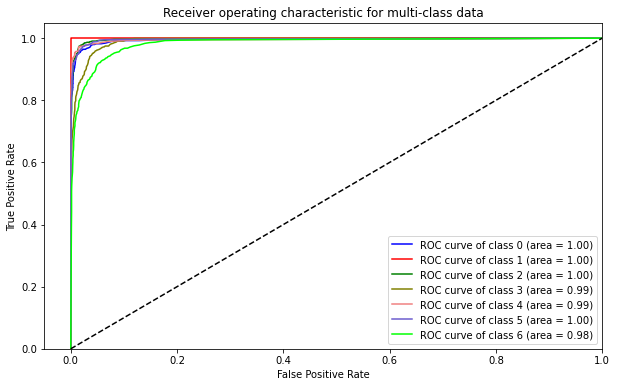

In [32]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'olive', 'lightcoral', 'slateblue', 'lime'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

### ANN Classification by Keras

In [35]:
df = pd.read_excel('D:/PGR210_Project/Dry_Bean_Dataset.xlsx')
x = df.drop("Class", axis = 1)
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
y = df['Class']
y_cat = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x.values, y_cat, test_size=0.2, random_state=5)

In [36]:
model = Sequential()
model.add(Dense(60, input_shape = (16,), activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(8, activation = "softmax"))
model.compile(Adam(learning_rate = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                1020      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                915       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 128       
Total params: 2,303
Trainable params: 2,303
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x_train, y_train, verbose=1, epochs=100)

Epoch 1/100
341/341 [==============================] - 1s 649us/step - loss: 0.3493 - accuracy: 0.8750
Epoch 2/100
341/341 [==============================] - 0s 585us/step - loss: 0.2411 - accuracy: 0.9163
Epoch 3/100
341/341 [==============================] - 0s 608us/step - loss: 0.2275 - accuracy: 0.9198
Epoch 4/100
341/341 [==============================] - 0s 576us/step - loss: 0.2293 - accuracy: 0.9183
Epoch 5/100
341/341 [==============================] - 0s 586us/step - loss: 0.2226 - accuracy: 0.9195
Epoch 6/100
341/341 [==============================] - 0s 580us/step - loss: 0.2121 - accuracy: 0.9216
Epoch 7/100
341/341 [==============================] - 0s 551us/step - loss: 0.2147 - accuracy: 0.9194
Epoch 8/100
341/341 [==============================] - 0s 578us/step - loss: 0.2064 - accuracy: 0.9257
Epoch 9/100
341/341 [==============================] - 0s 568us/step - loss: 0.2064 - accuracy: 0.9256
Epoch 10/100
341/341 [==============================] - 0s 606us/step - l

In [38]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy*100)

Test loss: 0.21488437056541443
Test accuracy: 92.6184356212616


## Hyperparameter tuning (by hand)

In [49]:
df = pd.read_excel('D:/PGR210_Project/Dry_Bean_Dataset.xlsx')
# Everything except target variable
X = df.drop("Class", axis=1)
y = df['Class']
#Binarize the output
y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6,7])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=25)

In [51]:
# Tuning of KNN
train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [52]:
train_scores

[1.0,
 0.7302403694762255,
 0.837934292012176,
 0.7095622966306288,
 0.7820929988453867,
 0.6912984150309647,
 0.7511283719953815,
 0.6736643224519786,
 0.7246772331269025,
 0.6639025926314684,
 0.7064133515272384,
 0.657184843077569,
 0.6945523249711346,
 0.6476330429306183,
 0.6822714390679122,
 0.6389209614779049,
 0.6732444631048599,
 0.6316783877401071,
 0.6612784717119765,
 0.6249606381862076]

In [53]:
test_scores

[0.7338393731635652,
 0.569539666993144,
 0.7113124387855044,
 0.6131243878550441,
 0.693437806072478,
 0.6131243878550441,
 0.6780117531831538,
 0.6060235063663075,
 0.6603819784524976,
 0.6045543584720862,
 0.653281096963761,
 0.6055337904015671,
 0.6513222331047992,
 0.5991674828599413,
 0.6368756121449559,
 0.5888834476003918,
 0.6280607247796278,
 0.5879040156709109,
 0.6212047012732616,
 0.5776199804113614]

Maximum KNN score on the test data: 73.38%


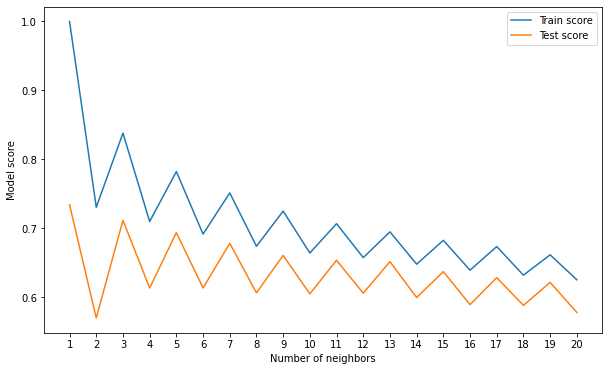

In [54]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* RandomForestClassifier()
... using RandomizedSearchCV

In [55]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [143]:
# Setup random seed
np.random.seed(25)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [57]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [58]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.9123408423114594

### Evaluting our tuned machine learning classifier

* ROC curve 
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [82]:
df = pd.read_excel('D:/PGR210_Project/Dry_Bean_Dataset.xlsx')
# Everything except target variable
X = df.drop("Class", axis=1)
y = df['Class']
#Binarize the output
y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6,7])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=25)

In [83]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [84]:
# Make predictions with tuned model
y_preds = rs_rf.predict(X_test)

In [85]:
y_preds

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [88]:
# Confusion matrix
print(confusion_matrix(y_test.argmax(axis=1), y_preds.argmax(axis=1)))

[[ 358    0   21    0    2    0   10]
 [   1  140    0    0    0    0    0]
 [  25    0  494    0    8    1    1]
 [  13    0    0 1000    0   16   38]
 [   7    0    8    5  511    0   10]
 [  15    0    0   16    0  596   13]
 [  26    0    0   86   11   13  639]]


In [87]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       391
           1       1.00      0.99      1.00       141
           2       0.94      0.93      0.94       529
           3       0.90      0.94      0.92      1067
           4       0.96      0.94      0.95       541
           5       0.95      0.93      0.94       640
           6       0.90      0.82      0.86       775

   micro avg       0.93      0.91      0.92      4084
   macro avg       0.94      0.92      0.93      4084
weighted avg       0.93      0.91      0.92      4084
 samples avg       0.91      0.91      0.91      4084



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plotting Classification Report

In [89]:
df = pd.read_excel('D:/PGR210_Project/Dry_Bean_Dataset.xlsx')
# Everything except target variable
X = df.drop("Class", axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state =25)
clf = OneVsRestClassifier(RandomForestClassifier(random_state=25)).fit(X_train, y_train)
df = pd.DataFrame(classification_report(clf.predict(X_test), 
                                        y_test, digits=2,
                                        output_dict=True)).T

df['support'] = df.support.apply(int)
df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
1,0.881612,0.951087,0.915033,368
2,1.000000,0.993671,0.996825,158
3,0.942740,0.920160,0.931313,501
4,0.939850,0.913242,0.926355,1095
5,0.951557,0.954861,0.953206,576
6,0.944079,0.950331,0.947195,604
7,0.868521,0.878517,0.873490,782
accuracy,0.925318,0.925318,0.925318,0
macro avg,0.932623,0.937410,0.934774,4084
weighted avg,0.925902,0.925318,0.925416,4084


### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [90]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [91]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=510, random_state=25)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=510, random_state=25)

In [92]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.4921043 , 0.75275533, 0.76047024, 0.68295371, 0.32586334])

In [93]:
# Since there are 5 metrics here, we'll take the average.
cv_acc = np.mean(cv_acc)
cv_acc

0.6028293824910558

In [104]:
df = pd.read_excel('D:/PGR210_Project/Dry_Bean_Dataset.xlsx')
# Everything except target variable
X = df.drop("Class", axis=1)
y = df['Class']
#Binarize the output
y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6,7])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=25)

In [105]:
y_preds

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [106]:
y_test = np.array(y_test)

In [107]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [109]:
precision = precision_score(y_test, y_preds, average='micro')
print('Precision: %.3f' % precision)
recall = recall_score(y_test, y_preds, average='micro')
print('Recall: %.3f' % recall)
f1 = f1_score(y_test, y_preds, average='micro')
print('f1: %.3f' % f1)

Precision: 0.930
Recall: 0.912
f1: 0.921


## Feature Importance

In [137]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Compactness        0.092951
Perimeter          0.092085
ShapeFactor1       0.091586
ShapeFactor3       0.091557
MinorAxisLength    0.082099
MajorAxisLength    0.079314
ConvexArea         0.074106
Eccentricity       0.065622
AspectRation       0.062890
roundness          0.054754
EquivDiameter      0.054586
Area               0.053867
ShapeFactor2       0.044269
ShapeFactor4       0.030024
Solidity           0.018876
Extent             0.011413
dtype: float64

In [138]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(feature_scores)))
feature_dict

{'Area': 0.09295104366899648,
 'Perimeter': 0.09208487400741568,
 'MajorAxisLength': 0.09158598238255419,
 'MinorAxisLength': 0.09155724505155527,
 'AspectRation': 0.08209944596785751,
 'Eccentricity': 0.07931417383501174,
 'ConvexArea': 0.07410613168906036,
 'EquivDiameter': 0.06562150933114613,
 'Extent': 0.06289040954460821,
 'Solidity': 0.054753963272880186,
 'roundness': 0.0545858279039601,
 'Compactness': 0.05386737872761022,
 'ShapeFactor1': 0.04426943579849974,
 'ShapeFactor2': 0.030023958242025604,
 'ShapeFactor3': 0.018876006531572384,
 'ShapeFactor4': 0.011412614045246225}

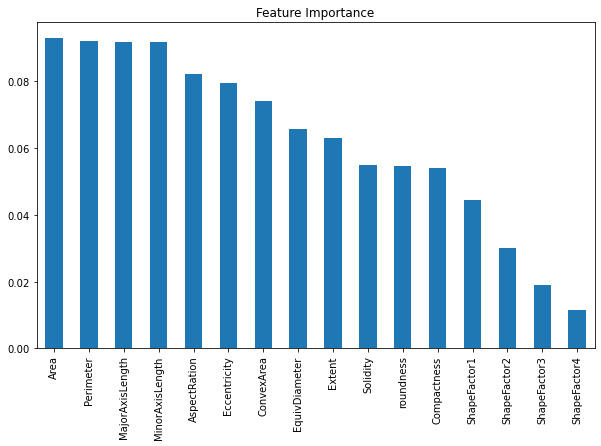

In [139]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## Hyperparamter Tuning with GridSearchCV

In [115]:
df = pd.read_excel('D:/PGR210_Project/Dry_Bean_Dataset.xlsx')
# Everything except target variable
X = df.drop("Class", axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=25)

In [116]:
# Setup grid hyperparameter search for LogisticRegression
gs_rf_reg = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=3,
                          scoring = 'roc_auc_ovr',
                          n_jobs = -1,
                          verbose=2)

# Fit grid hyperparameter search model
gs_rf_reg.fit(X_train, y_train);

Fitting 3 folds for each of 7200 candidates, totalling 21600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 52.5min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 62.4min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 70.9min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 76.8min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 83.1min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

In [117]:
# Check the best hyperparmaters
gs_rf_reg.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 810}

In [118]:
# Evaluate the grid search RandomForest model
gs_rf_reg.score(X_test, y_test)

0.9945533025465723